In [3]:
# SETUP PATHS

WORKSPACE_PATH = 'workspace'
SCRIPTS_PATH = 'scripts'
APIMODEL_PATH = 'models'
ANNOTATION_PATH = WORKSPACE_PATH+'/annotations'
IMAGE_PATH = WORKSPACE_PATH+'/images'

In [5]:
import pandas as pd

df = pd.read_csv(ANNOTATION_PATH + '/SKRIPSI/annotation.csv', index_col=False)

In [6]:
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,image 1.jpg,2560,1600,car,1098,677,1212,799
1,image 1.jpg,2560,1600,car,1224,693,1369,841
2,image 1.jpg,2560,1600,car,1449,687,1604,836
3,image 1.jpg,2560,1600,motorcycle,420,657,583,963
4,image 1.jpg,2560,1600,motorcycle,755,663,903,997
...,...,...,...,...,...,...,...,...
21225,image 999.jpg,2560,1600,car,1407,671,1770,975
21226,image 999.jpg,2560,1600,motorcycle,1868,593,2411,1181
21227,image 999.jpg,2560,1600,motorcycle,2356,701,2554,1083
21228,image 999.jpg,2560,1600,motorcycle,1113,707,1150,805


In [7]:
X = df.drop(['class'], axis=1)
y = df['class']

In [8]:
df['class'].value_counts()

car           8531
motorcycle    6897
person        4325
pothole       1477
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

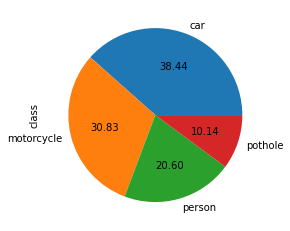

In [6]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

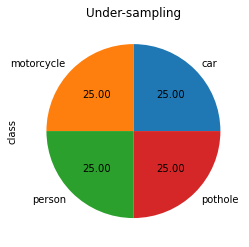

In [7]:
from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [8]:
# Class distribution
y_res.value_counts()

car           2138
motorcycle    2138
person        2138
pothole       2138
Name: class, dtype: int64

In [35]:
df1 = pd.DataFrame(X_res)

In [36]:
df1.head()

,filename,width,height,xmin,ymin,xmax,ymax
0,image 895.jpg,2560,1600,1285,701,1391,809
1,image 1587.jpg,2560,1600,1466,706,1646,882
2,image 175.jpg,2560,1600,339,625,739,861
3,image 1462.jpg,2560,1600,1117,850,1313,1044
4,image 998.jpg,2560,1600,1325,699,1421,813


In [37]:
df2 = pd.DataFrame(y_res)

In [38]:
df2.head()

,class
0,car
1,car
2,car
3,car
4,car


In [49]:
data = pd.concat([df1,df2], axis=1)

In [50]:
data.head()

,filename,width,height,xmin,ymin,xmax,ymax,class
0,image 895.jpg,2560,1600,1285,701,1391,809,car
1,image 1587.jpg,2560,1600,1466,706,1646,882,car
2,image 175.jpg,2560,1600,339,625,739,861,car
3,image 1462.jpg,2560,1600,1117,850,1313,1044,car
4,image 998.jpg,2560,1600,1325,699,1421,813,car


In [58]:
balance = data[['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']]

In [59]:
balance

,filename,width,height,class,xmin,ymin,xmax,ymax
0,image 895.jpg,2560,1600,car,1285,701,1391,809
1,image 1587.jpg,2560,1600,car,1466,706,1646,882
2,image 175.jpg,2560,1600,car,339,625,739,861
3,image 1462.jpg,2560,1600,car,1117,850,1313,1044
4,image 998.jpg,2560,1600,car,1325,699,1421,813
...,...,...,...,...,...,...,...,...
8547,pothole (98).JPG,1280,800,pothole,583,461,615,467
8548,pothole (99).JPG,1280,800,pothole,702,503,740,521
8549,pothole (99).JPG,1280,800,pothole,670,488,729,501
8550,pothole (99).JPG,1280,800,pothole,574,466,605,479


In [60]:
data_balance = balance.to_csv(ANNOTATION_PATH + '/SKRIPSI/data.csv', index=None)

In [62]:
data1 = pd.read_csv(ANNOTATION_PATH + '/SKRIPSI/data.csv', index_col=False)

In [63]:
data1

,filename,width,height,class,xmin,ymin,xmax,ymax
0,image 895.jpg,2560,1600,car,1285,701,1391,809
1,image 1587.jpg,2560,1600,car,1466,706,1646,882
2,image 175.jpg,2560,1600,car,339,625,739,861
3,image 1462.jpg,2560,1600,car,1117,850,1313,1044
4,image 998.jpg,2560,1600,car,1325,699,1421,813
...,...,...,...,...,...,...,...,...
8547,pothole (98).JPG,1280,800,pothole,583,461,615,467
8548,pothole (99).JPG,1280,800,pothole,702,503,740,521
8549,pothole (99).JPG,1280,800,pothole,670,488,729,501
8550,pothole (99).JPG,1280,800,pothole,574,466,605,479


In [64]:
data1['class'].value_counts()

car           2138
motorcycle    2138
person        2138
pothole       2138
Name: class, dtype: int64